<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
df = datasets.load_wine(as_frame=True)

In [3]:
X=df['data']
y=df['target']

In [4]:
X

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
clf = GradientBoostingClassifier()

In [10]:
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [12]:
cross_val_score(clf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.898913043478261

In [13]:
param_grid = {
    'n_estimators':[10,50,100,500],
    'learning_rate':[0.0001,0.001,0.01,0.1,1.0],
    'max_depth':[3,5,7,9]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
clf2 = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)

In [16]:
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [10, 50, 100, 500]})

In [17]:
clf2.best_params_

{'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 50}

In [18]:
clf2.best_score_

0.941304347826087

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

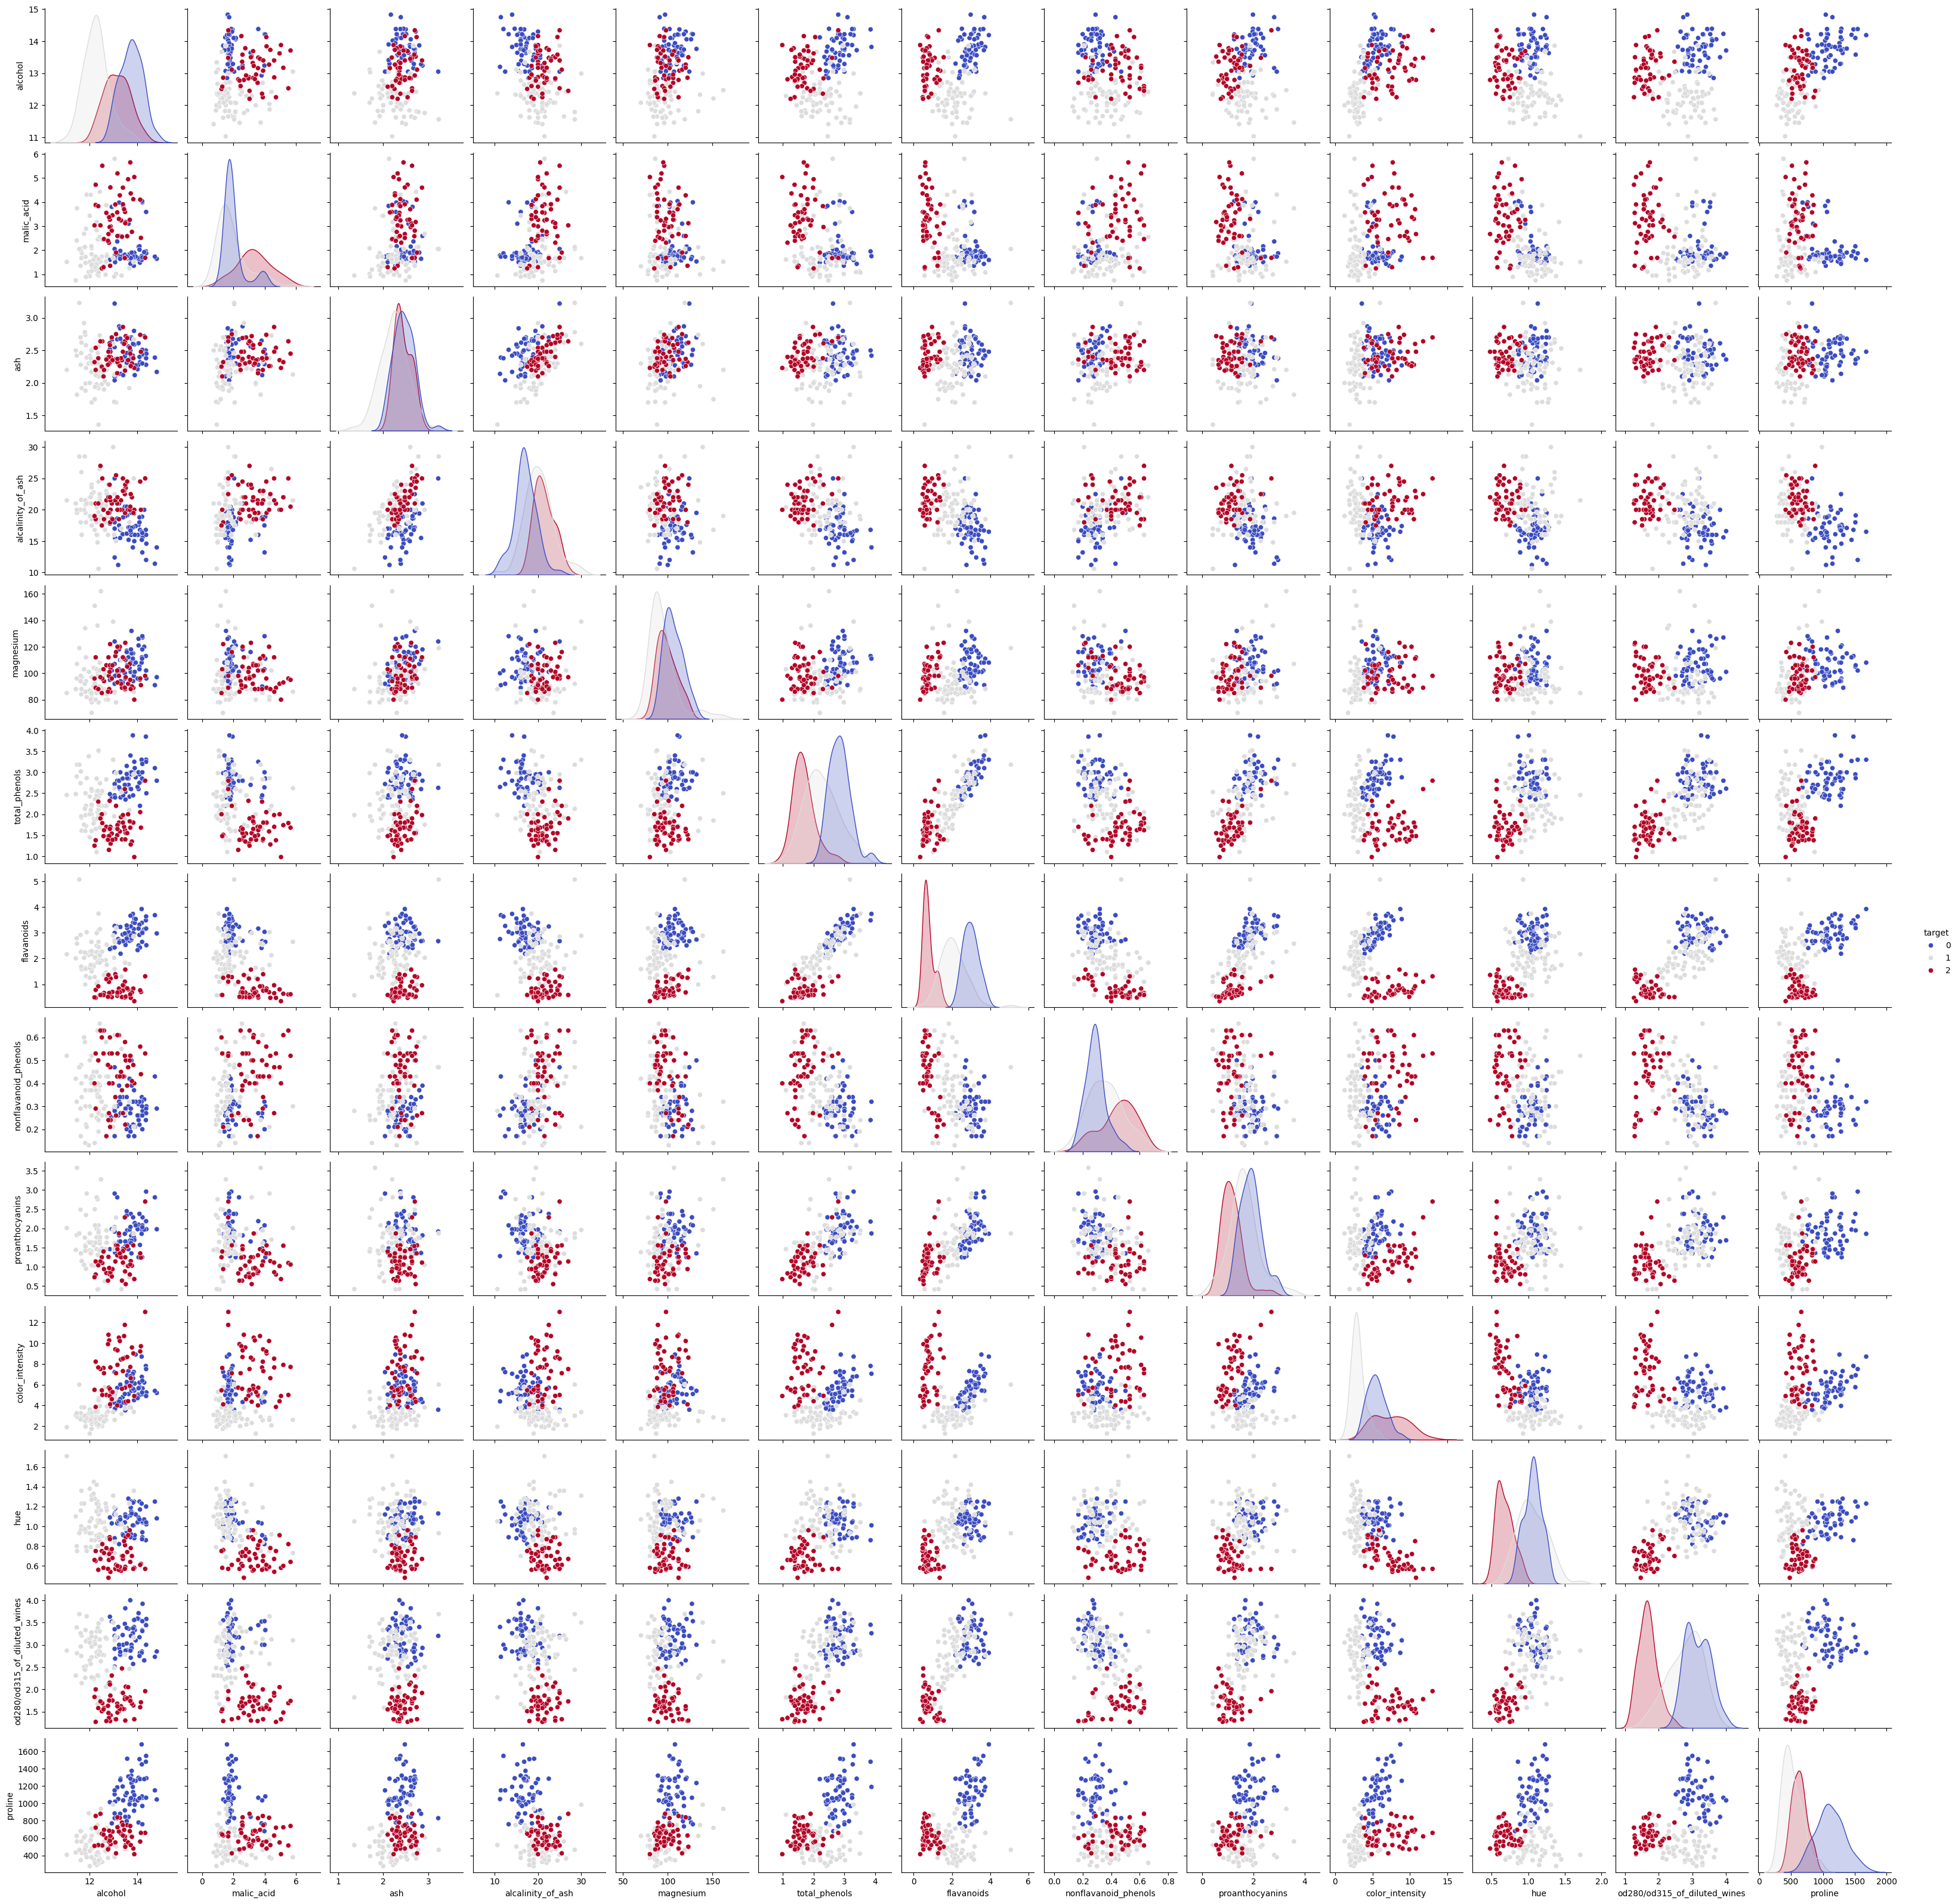

In [21]:
data = X.copy()
data['target'] = y

# Plot pairplot
sns.pairplot(data, hue='target', diag_kind='kde', palette='coolwarm')
plt.show()

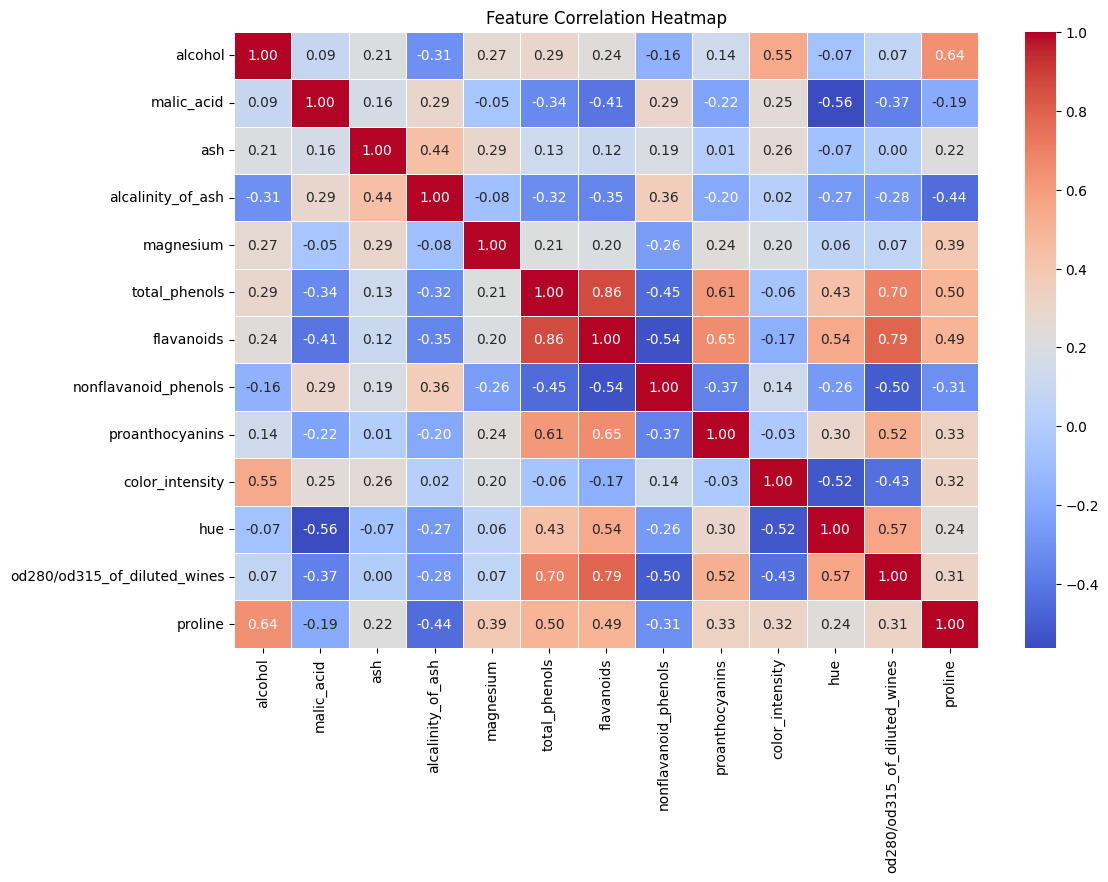

In [22]:
import numpy as np

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


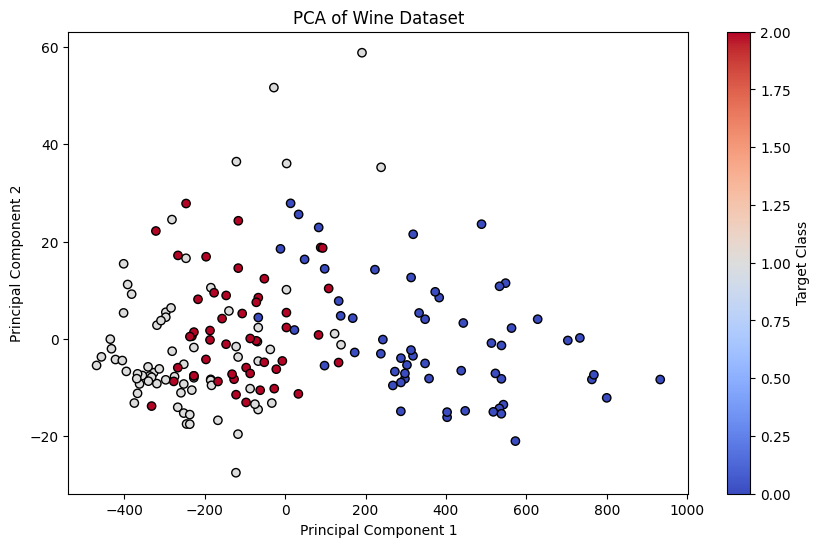

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset")
plt.colorbar(label="Target Class")
plt.show()

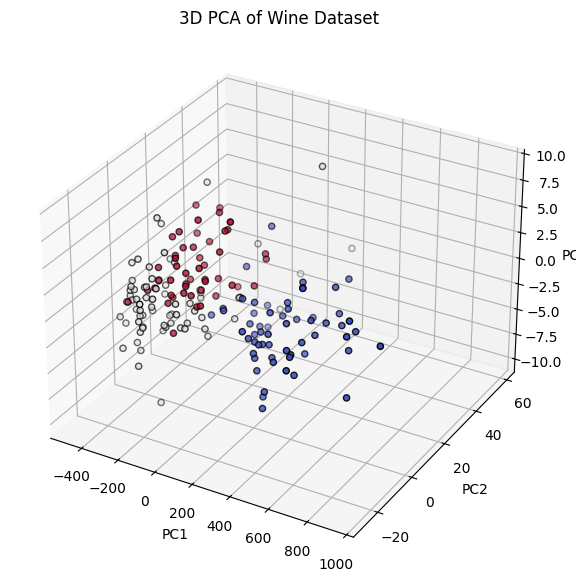

In [24]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='coolwarm', edgecolor='k')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA of Wine Dataset")
plt.show()
